In [ ]:
!python -m pip install --index-url https://support.bayesfusion.com/pysmile-A/ pysmile

Looking in indexes: https://support.bayesfusion.com/pysmile-A/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy
import itertools
import pysmile
import pprint

In [ ]:
pysmile.License((
	b"SMILE LICENSE 2c4f954d 72216c8d e0e08fa1 "
	b"THIS IS AN ACADEMIC LICENSE AND CAN BE USED "
	b"SOLELY FOR ACADEMIC RESEARCH AND TEACHING, "
	b"AS DEFINED IN THE BAYESFUSION ACADEMIC "
	b"SOFTWARE LICENSING AGREEMENT. "
	b"Serial #: 6elhdnh8czmjbetdjhpo4d5vl "
	b"Issued for: Jaime Perez (jaime.perez.sanchez@gmail.com) "
	b"Academic institution: Universidad Pontificia Comillas "
	b"Valid until: 2023-11-17 "
	b"Issued by BayesFusion activation server"
	),[
	0x65,0x83,0x6e,0x39,0x81,0x24,0xbf,0x37,0x03,0x5e,0xb5,0x21,0xf1,0x77,0x2e,0x56,
	0xab,0x6b,0x43,0x35,0x23,0x31,0xa9,0xaf,0x98,0x23,0x48,0xae,0x87,0x60,0x02,0x1c,
	0xf5,0x6e,0x83,0x2d,0x47,0xda,0x5f,0x65,0x10,0xf3,0x4c,0x38,0x7c,0x71,0x19,0x20,
	0x00,0x27,0x04,0x9f,0x53,0x8a,0xe5,0x95,0x27,0xc1,0xa7,0xbd,0xa4,0x2b,0xd0,0xb2])

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1PxUGRRXEz5ekptKqTrU0FeLPGR8OtJes',
                                    dest_path='./DAG_3rd_pilot_Compare.zip',
                                    unzip=False)

In [ ]:
!unzip DAG_3rd_pilot_Compare.zip

Archive:  DAG_3rd_pilot_Compare.zip
  inflating: DAG_3rd_pilot_Compare.xdsl  
  inflating: DAG_3rd_pilot_Compare_8Q.xdsl  
  inflating: DAG_3rd_pilot_Compare_8Q_wLabels.xdsl  
  inflating: DAG_3rd_pilot_Compare_wLabels.xdsl  


In [ ]:
normalization = math.sqrt(math.log(2))
normalization

0.8325546111576977

In [ ]:
def arrow_strenght_JS_flex(dag, lst_var, evd_name):

  # CB_Offending = None
  dag.set_evidence(evd_name, 0)
  dag.update_beliefs()
  dict_beliefs_0 = {}
  for var in lst_var:
    beliefs = dag.get_node_value(var)
    dict_beliefs_0[var] = beliefs

  # CB_Offending = Bully
  dag.set_evidence(evd_name, 1)
  dag.update_beliefs()
  dict_beliefs_1 = {}
  for var in lst_var:
    beliefs = dag.get_node_value(var)
    dict_beliefs_1[var] = beliefs

  # Jensen-Shannon distances
  dir_distances = {}
  for var in lst_var:
    arr_0 = dict_beliefs_0.get(var)
    arr_1 = dict_beliefs_1.get(var)
    dist = scipy.spatial.distance.jensenshannon(arr_0, arr_1)/normalization
    # dist = kl_divergence(arr_0, arr_1)
    dir_distances[var] = dist

  # print sorted results
  return sorted(dir_distances.items(), key=lambda x: -x[1])

In [ ]:
def arrow_strenght_JS(dag, lst_var):

  # CB_Offending = None
  dag.set_evidence("CB_Offending", 0)
  dag.update_beliefs()
  dict_beliefs_0 = {}
  for var in lst_var:
    beliefs = dag.get_node_value(var)
    dict_beliefs_0[var] = beliefs

  # CB_Offending = Bully
  dag.set_evidence("CB_Offending", 1)
  dag.update_beliefs()
  dict_beliefs_1 = {}
  for var in lst_var:
    beliefs = dag.get_node_value(var)
    dict_beliefs_1[var] = beliefs

  # Jensen-Shannon distances
  dir_distances = {}
  for var in lst_var:
    arr_0 = dict_beliefs_0.get(var)
    arr_1 = dict_beliefs_1.get(var)
    dist = scipy.spatial.distance.jensenshannon(arr_0, arr_1)/normalization
    # dist = kl_divergence(arr_0, arr_1)
    dir_distances[var] = dist

  # print sorted results
  return sorted(dir_distances.items(), key=lambda x: -x[1])

# BNs with ground truth

## 8 game questions


In [ ]:
lst_var_8Q = ['Age', 'Gender', 'Hours_Internet', 'Social_Support',
              'Family_Support', 'Self_Esteem', 'Honesty', 'Empathy',
              'A1_2_Sociable', 'A1_3_MatthewMeme','A3_2_Pol_Pola', 'A3_3_time_overrun',
              'A3_4_Pol_Bullied', 'A3_5_remind_Matthew', 'A3_6_Talk_Pol', 'A3_7_Help_Pol']

In [ ]:
lst_var_CT = ['Age', 'Gender', 'Family_Support', 'Social_Support',
              'Hours_Internet', 'Conscientiousness_BF', 'Agreeableness_BF',
              'Neuroticism_BF', 'CT_risk', 'Honesty',
              'A3_1_pirated_Content', 'A2_2_pass', 'A4_1_phishing',
              'A4_2_pass', 'A4_3_stolen', 'A4_4_other_stolen']

In [ ]:
lst_var_FN = ['Age', 'Gender', 'Family_Support', 'Social_Support',
              'Hours_Internet', 'CB_Offending', 'Migratory_background',
              'Conscientiousness_BF', 'Agreeableness_BF', 'Neuroticism_BF',
              'FN_risk', 'Honesty',
              'A6_6_regarding_charles', 'A6_4_accu', 'A6_5_replay_post',
              'A6_3_source', 'A6_2_look', 'A6_1_news_check']

In [ ]:
lst_var_OG = ['Age', 'Gender', 'Sexual_Orientation', 'Migratory_background',
              'Self_Esteem', 'Social_Support', 'Family_Support', 'Introversion_BF',
              'Hours_Internet', 'Openness2Experience_BF', 'Agreeableness_BF', 'Neuroticism_BF',
              'OG_risk', 'Honesty',
              'A2_1_name', 'A2_3_prof_type', 'A2_7_usepc',
              'A5_1_secret', 'A2_8_friend_rq', 'A5_3_sheila',
              'A2_10_photos_nk', 'A2_15_block_prof', 'A2_9_photos',
              'A2_14_tell_parents', 'A2_11_photos_nkplus', 'A2_12_ask_help',
              'A2_4_place', 'A2_5_prof_photo', 'A2_13_close_case', 'A5_2_biology']

In [ ]:
DAG_CT = pysmile.Network()
DAG_CT.read_file("DAG_CT_v2_trained.xdsl")
#DAG_CT.update_beliefs()

In [ ]:
DAG_FN = pysmile.Network()
DAG_FN.read_file("DAG_FN_v2_trained.xdsl")
#DAG_FN.update_beliefs()

In [ ]:
DAG_OG = pysmile.Network()
DAG_OG.read_file("DAG_OG_v2_trained.xdsl")
#DAG_OG.update_beliefs()

SMILEException: ignored

In [ ]:
df_DAG_CT = pd.read_csv("data_DAG_CT_v2.csv")
df_DAG_FN = pd.read_csv("data_DAG_FN_v2.csv")
df_DAG_OG = pd.read_csv("data_DAG_OG_v2.csv")

# Tunning of DAG_CT

La estructura inicial de la red tiene bien definida las conexiones entre nodos superiores pero no están bien seleccionadas las preguntas en función de las aventuras y las eventos asignados a estas aventuras.

Las aventuras asignadas a este cyber delito son las siguientes:

Aventura 4 e Inicio de Aventura 2


In [ ]:
DAG_CT.get_all_node_ids()

['Age',
 'Gender',
 'Family_Support',
 'Social_Support',
 'Hours_Internet',
 'Conscientiousness_BF',
 'Agreeableness_BF',
 'Neuroticism_BF',
 'CT_risk',
 'Honesty',
 'A3_1_pirated_Content',
 'A2_2_pass',
 'A4_1_phishing',
 'A4_2_pass',
 'A4_3_stolen',
 'A4_4_other_stolen']

# Tunning of DAG_FN

La estructura inicial de la red tiene bien definida las conexiones entre nodos superiores pero no están bien seleccionadas las preguntas en función de las aventuras y las eventos asignados a estas aventuras.

Las aventuras asignadas a este cyber delito son las siguientes:

Aventura 6 de la que se han seleccionado algunas cuestiones.

In [ ]:
DAG_FN.get_all_node_ids()

['Age',
 'Gender',
 'Family_Support',
 'Social_Support',
 'Hours_Internet',
 'CB_Offending',
 'Migratory_background',
 'Conscientiousness_BF',
 'Agreeableness_BF',
 'Neuroticism_BF',
 'FN_risk',
 'Honesty',
 'A6_6_regarding_charles',
 'A6_4_accu',
 'A6_5_replay_post',
 'A6_3_source',
 'A6_2_look',
 'A6_1_news_check']

# Tunning of DAG_OG

La estructura inicial de la red tiene bien definida las conexiones entre nodos superiores pero no están bien seleccionadas las preguntas en función de las aventuras y las eventos asignados a estas aventuras.

Las aventuras asignadas a este cyber delito son las siguientes:

Aventura 2 y Aventura 5

In [ ]:
DAG_OG.get_all_node_ids()

['Age',
 'Gender',
 'Sexual_Orientation',
 'Migratory_background',
 'Self_Esteem',
 'Social_Support',
 'Family_Support',
 'Introversion_BF',
 'Hours_Internet',
 'Openness2Experience_BF',
 'Agreeableness_BF',
 'Neuroticism_BF',
 'OG_risk',
 'Honesty',
 'A2_1_name',
 'A2_3_prof_type',
 'A2_7_usepc',
 'A5_1_secret',
 'A2_8_friend_rq',
 'A5_3_sheila',
 'A2_10_photos_nk',
 'A2_15_block_prof',
 'A2_9_photos',
 'A2_14_tell_parents',
 'A2_11_photos_nkplus',
 'A2_12_ask_help',
 'A2_4_place',
 'A2_5_prof_photo',
 'A2_13_close_case',
 'A5_2_biology']

In [ ]:
import re

In [ ]:
lol_vars = [list(df_DAG_CT.columns), list(df_DAG_FN.columns), list(df_DAG_OG.columns)]

# Flatten the list of lists using list comprehension
l_vars = [item for sublist in lol_vars for item in sublist]

# Convert the flattened list to a set to get unique values
unique_vars = list(set(l_vars))

In [ ]:
unique_vars

['Gender',
 'A2_4_place',
 'A6_3_source',
 'A2_14_tell_parents',
 'Introversion_BF',
 'A2_9_photos',
 'Conscientiousness_BF',
 'A4_4_other_stolen',
 'A2_1_name',
 'A2_8_friend_rq',
 'A5_1_secret',
 'A2_12_ask_help',
 'Sexual_Orientation',
 'Previous_victimization',
 'A3_4_Pol_Bullied',
 'user_id',
 'Self_Esteem',
 'A6_2_look',
 'A2_13_close_case',
 'Age',
 'A6_1_news_check',
 'A1_1_PhotoSharing',
 'A2_7_usepc',
 'Agreeableness_BF',
 'A3_7_Help_Pol',
 'Empathy',
 'A2_10_photos_nk',
 'A4_1_phishing',
 'A1_3_MatthewMeme',
 'A3_2_Pol_Pola',
 'Migratory_background',
 'A2_11_photos_nkplus',
 'Honesty',
 'A3_1_pirated_Content',
 'A1_2_Sociable',
 'A1_0_Bowling',
 'Family_Support',
 'A3_5_remind_Matthew',
 'A2_5_prof_photo',
 'CB_Offending',
 'A3_6_Talk_Pol',
 'A2_2_pass',
 'A5_2_biology',
 'Neuroticism_BF',
 'A4_3_stolen',
 'A5_3_sheila',
 'Hours_Internet',
 'Openness2Experience_BF',
 'A4_2_pass',
 'A6_6_regarding_charles',
 'A2_15_block_prof',
 'A6_5_replay_post',
 'A3_3_time_overrun',
 'Soc

In [ ]:
import re

In [ ]:
# Regular expression pattern to select values with 'A' in them
l_pattern = [r'^A'+str(i) for i in range(1,7)]
l_vars = [[s for s in unique_vars if re.search(pp, s)] for pp in l_pattern]
# Using re.findall() to find all values that match the pattern
l_vars

[['A1_1_PhotoSharing', 'A1_3_MatthewMeme', 'A1_2_Sociable', 'A1_0_Bowling'],
 ['A2_4_place',
  'A2_14_tell_parents',
  'A2_9_photos',
  'A2_1_name',
  'A2_8_friend_rq',
  'A2_12_ask_help',
  'A2_13_close_case',
  'A2_7_usepc',
  'A2_10_photos_nk',
  'A2_11_photos_nkplus',
  'A2_5_prof_photo',
  'A2_2_pass',
  'A2_15_block_prof',
  'A2_3_prof_type'],
 ['A3_4_Pol_Bullied',
  'A3_7_Help_Pol',
  'A3_2_Pol_Pola',
  'A3_1_pirated_Content',
  'A3_5_remind_Matthew',
  'A3_6_Talk_Pol',
  'A3_3_time_overrun'],
 ['A4_4_other_stolen', 'A4_1_phishing', 'A4_3_stolen', 'A4_2_pass'],
 ['A5_1_secret', 'A5_2_biology', 'A5_3_sheila'],
 ['A6_3_source',
  'A6_2_look',
  'A6_1_news_check',
  'A6_6_regarding_charles',
  'A6_5_replay_post',
  'A6_4_accu']]

In [ ]:
DAG_OG.get_all_node_ids()

['Age',
 'Gender',
 'Sexual_Orientation',
 'Migratory_background',
 'Self_Esteem',
 'Social_Support',
 'Family_Support',
 'Introversion_BF',
 'Hours_Internet',
 'Openness2Experience_BF',
 'Agreeableness_BF',
 'Neuroticism_BF',
 'OG_risk',
 'Honesty',
 'A2_1_name',
 'A2_3_prof_type',
 'A2_7_usepc',
 'A5_1_secret',
 'A2_8_friend_rq',
 'A5_3_sheila',
 'A2_10_photos_nk',
 'A2_15_block_prof',
 'A2_9_photos',
 'A2_14_tell_parents',
 'A2_11_photos_nkplus',
 'A2_12_ask_help',
 'A2_4_place',
 'A2_5_prof_photo',
 'A2_13_close_case',
 'A5_2_biology']

In [ ]:
lst_cpd_8Q_CT = DAG_CT.get_node_definition('CT_risk')
arr_cpd_8Q_CT = np.array(lst_cpd_8Q_CT).reshape(len(lst_cpd_8Q_CT)//2,2)
arr_cpd_8Q_CT.shape

(18225, 2)

In [ ]:
lst_cpd_8Q_FN = DAG_FN.get_node_definition('FN_risk')
arr_cpd_8Q_FN = np.array(lst_cpd_8Q_FN).reshape(len(lst_cpd_8Q_FN)//2,2)
arr_cpd_8Q_FN.shape

(109350, 2)

In [ ]:
lst_cpd_8Q_OG = DAG_OG.get_node_definition('OG_risk')
arr_cpd_8Q_OG = np.array(lst_cpd_8Q_OG).reshape(len(lst_cpd_8Q_OG)//2,2)
arr_cpd_8Q_OG.shape

(1, 2)

In [ ]:
lst_cpd_8Q_OG

[0.5, 0.5]

In [ ]:
analysis_CT = arrow_strenght_JS_flex(DAG_CT, DAG_CT.get_all_node_ids(), 'CT_risk')
analysis_CT

[('CT_risk', 1.0),
 ('A4_2_pass', 0.7521716435324325),
 ('A2_2_pass', 0.4525788894547384),
 ('A4_3_stolen', 0.3668198030392301),
 ('A4_1_phishing', 0.2976678500319034),
 ('A4_4_other_stolen', 0.2303428757681369),
 ('A3_1_pirated_Content', 0.2291919640653455),
 ('Honesty', 0.20244154497334668),
 ('Gender', 0.013034311331042882),
 ('Hours_Internet', 0.009550220602301958),
 ('Age', 0.0067077892103640764),
 ('Neuroticism_BF', 0.004133882867585639),
 ('Social_Support', 0.003289482733088722),
 ('Agreeableness_BF', 0.0031870532995380025),
 ('Conscientiousness_BF', 0.002171760073095361),
 ('Family_Support', 0.00019821746965816264)]

In [ ]:
analysis_FN = arrow_strenght_JS_flex(DAG_FN, DAG_FN.get_all_node_ids(), 'FN_risk')
analysis_FN

[('FN_risk', 1.0),
 ('A6_3_source', 0.41999085399892966),
 ('A6_4_accu', 0.3866278982896538),
 ('A6_2_look', 0.37130432879419184),
 ('A6_6_regarding_charles', 0.29988808521262217),
 ('A6_1_news_check', 0.20940699337747734),
 ('Honesty', 0.176884446031237),
 ('A6_5_replay_post', 0.15273529714933948),
 ('Conscientiousness_BF', 0.004574092483056207),
 ('Neuroticism_BF', 0.0045549228779911),
 ('Gender', 0.00328492287406516),
 ('Age', 0.0022767959243738846),
 ('CB_Offending', 0.002184722484911903),
 ('Hours_Internet', 0.0021064676092980177),
 ('Agreeableness_BF', 0.0016551681631666875),
 ('Family_Support', 0.0011091867062439716),
 ('Migratory_background', 0.0009867819313378568),
 ('Social_Support', 0.0009609027865554108)]

In [ ]:
analysis_OG = arrow_strenght_JS_flex(DAG_OG, DAG_OG.get_all_node_ids(), 'OG_risk')
analysis_OG

[('OG_risk', 1.0),
 ('A2_4_place', 0.39837484824149594),
 ('A2_8_friend_rq', 0.37735688454192867),
 ('A2_9_photos', 0.3534296621640812),
 ('A2_3_prof_type', 0.33961797505221314),
 ('A2_5_prof_photo', 0.24953101039280107),
 ('A5_1_secret', 0.20365251475366086),
 ('A2_15_block_prof', 0.18558322272270142),
 ('A2_1_name', 0.16323675327134818),
 ('A5_2_biology', 0.16029425468428504),
 ('A2_14_tell_parents', 0.15478078952568528),
 ('A2_12_ask_help', 0.13802391199371652),
 ('A2_11_photos_nkplus', 0.11332837469832811),
 ('A2_7_usepc', 0.11320779980828574),
 ('A2_13_close_case', 0.07971074608901471),
 ('Honesty', 0.055458775829517956),
 ('A5_3_sheila', 0.023736011791780285),
 ('A2_10_photos_nk', 0.021252753655848566),
 ('Gender', 0.006314469338453928),
 ('Family_Support', 0.004227289258057049),
 ('Migratory_background', 0.0035791376529782488),
 ('Social_Support', 0.003565578151233199),
 ('Openness2Experience_BF', 0.003537506676220059),
 ('Neuroticism_BF', 0.003401835279452013),
 ('Self_Esteem',

## 10 game questions


In [ ]:
lst_var_10Q = ['Age', 'Gender', 'Hours_Internet', 'Social_Support',
              'Family_Support', 'Self_Esteem', 'Honesty', 'Empathy',
              'A1_1_PhotoSharing', 'A1_2_Sociable', 'A1_3_MatthewMeme',
              'A3_1_pirated_Content', 'A3_2_Pol_Pola', 'A3_3_time_overrun',
              'A3_4_Pol_Bullied','A3_5_remind_Matthew', 'A3_6_Talk_Pol', 'A3_7_Help_Pol']

In [ ]:
DAG_10Q_postQ = pysmile.Network()
DAG_10Q_postQ.read_file("DAG_3rd_pilot_Compare_wLabels.xdsl")
DAG_10Q_postQ.update_beliefs()

lst_cpd_10Q_postQ = DAG_10Q_postQ.get_node_definition('CB_Offending')
arr_cpd_10Q_postQ = np.array(lst_cpd_10Q_postQ).reshape(len(lst_cpd_10Q_postQ)//2,2)
arr_cpd_10Q_postQ.shape

(4050, 2)

In [ ]:
analysis_10Q = arrow_strenght_JS(DAG_10Q_postQ, lst_var_10Q)
analysis_10Q

[('A3_3_time_overrun', 0.20717656070803622),
 ('A3_4_Pol_Bullied', 0.1933986085489959),
 ('A3_5_remind_Matthew', 0.1805666222180073),
 ('A1_3_MatthewMeme', 0.17109126652351409),
 ('A3_1_pirated_Content', 0.16058185315273302),
 ('A3_7_Help_Pol', 0.12276141800650048),
 ('A3_2_Pol_Pola', 0.1047155309341356),
 ('Honesty', 0.07488307008917672),
 ('Age', 0.07219288927889714),
 ('Gender', 0.07102674553196404),
 ('A3_6_Talk_Pol', 0.06771756694444009),
 ('Hours_Internet', 0.06060569671203478),
 ('Family_Support', 0.05054773707309435),
 ('Social_Support', 0.043015357960764035),
 ('A1_2_Sociable', 0.016115662455145875),
 ('Self_Esteem', 0.012062652403300459),
 ('Empathy', 0.004323932563979154),
 ('A1_1_PhotoSharing', 0.0022830097453999843)]

# BNs without ground truth

## 8 game questions


In [ ]:
lst_var_8Q = ['Age', 'Gender', 'Hours_Internet', 'Social_Support',
              'Family_Support', 'Self_Esteem', 'Honesty', 'Empathy',
              'A1_2_Sociable', 'A1_3_MatthewMeme','A3_2_Pol_Pola', 'A3_3_time_overrun',
              'A3_4_Pol_Bullied', 'A3_5_remind_Matthew', 'A3_6_Talk_Pol', 'A3_7_Help_Pol']

In [ ]:
DAG_8Q_postQ_latent = pysmile.Network()
DAG_8Q_postQ_latent.read_file("DAG_3rd_pilot_Compare_8Q.xdsl")
DAG_8Q_postQ_latent.update_beliefs()

lst_cpd_8Q_postQ_latent = DAG_8Q_postQ_latent.get_node_definition('CB_Offending')
arr_cpd_8Q_postQ_latent = np.array(lst_cpd_8Q_postQ_latent).reshape(len(lst_cpd_8Q_postQ_latent)//2,2)
arr_cpd_8Q_postQ_latent.shape

SMILEException: ignored

In [ ]:
analysis_8Q_latent = arrow_strenght_JS(DAG_8Q_postQ_latent, lst_var_8Q)
analysis_8Q_latent

[('A3_3_time_overrun', 0.39641412920272373),
 ('A3_7_Help_Pol', 0.39100069356414224),
 ('A3_2_Pol_Pola', 0.3895277566851121),
 ('A3_4_Pol_Bullied', 0.3884146585267692),
 ('A1_3_MatthewMeme', 0.3627786425712408),
 ('A3_5_remind_Matthew', 0.2198727953894382),
 ('Honesty', 0.19591018173821087),
 ('A1_2_Sociable', 0.14326638023482738),
 ('A3_6_Talk_Pol', 0.10223515435817931),
 ('Gender', 0.04935984617328413),
 ('Age', 0.03831934060516103),
 ('Self_Esteem', 0.028911791801148713),
 ('Social_Support', 0.028655639936051466),
 ('Hours_Internet', 0.0264949075290606),
 ('Family_Support', 0.02172910142088425),
 ('Empathy', 0.007751588753414321)]

## 10 game questions


In [ ]:
lst_var_10Q = ['Age', 'Gender', 'Hours_Internet', 'Social_Support',
              'Family_Support', 'Self_Esteem', 'Honesty', 'Empathy',
              'A1_1_PhotoSharing', 'A1_2_Sociable', 'A1_3_MatthewMeme',
              'A3_1_pirated_Content', 'A3_2_Pol_Pola', 'A3_3_time_overrun',
              'A3_4_Pol_Bullied','A3_5_remind_Matthew', 'A3_6_Talk_Pol', 'A3_7_Help_Pol']

In [ ]:
DAG_10Q_postQ_latent = pysmile.Network()
DAG_10Q_postQ_latent.read_file("DAG_3rd_pilot_Compare.xdsl")
DAG_10Q_postQ_latent.update_beliefs()

lst_cpd_10Q_postQ_latent = DAG_10Q_postQ_latent.get_node_definition('CB_Offending')
arr_cpd_10Q_postQ_latent = np.array(lst_cpd_10Q_postQ_latent).reshape(len(lst_cpd_10Q_postQ_latent)//2,2)
arr_cpd_10Q_postQ_latent.shape

(4050, 2)

In [ ]:
analysis_10Q_latent = arrow_strenght_JS(DAG_10Q_postQ_latent, lst_var_10Q)
analysis_10Q_latent

[('A3_2_Pol_Pola', 0.39495514758795636),
 ('A3_4_Pol_Bullied', 0.39451642548470106),
 ('A1_3_MatthewMeme', 0.31967125671419316),
 ('A3_3_time_overrun', 0.31925308635238875),
 ('A3_7_Help_Pol', 0.29286827615625155),
 ('A3_1_pirated_Content', 0.28619505175643),
 ('Honesty', 0.20388373587847533),
 ('A3_5_remind_Matthew', 0.18957973110515433),
 ('A3_6_Talk_Pol', 0.12015082101145602),
 ('A1_2_Sociable', 0.10823476432072399),
 ('Gender', 0.08670812866114408),
 ('Age', 0.06616288054836716),
 ('Social_Support', 0.04631973009419927),
 ('Family_Support', 0.044490977517731414),
 ('Self_Esteem', 0.03949096773415159),
 ('Hours_Internet', 0.037446557335952),
 ('A1_1_PhotoSharing', 0.03129603126171155),
 ('Empathy', 0.016270858826105628)]

# Comparison (Rank Correlation)

## 8Q vs. Latent_8Q

In [ ]:
lst_rank_8Q = [i[1] for i in analysis_8Q]

analysis_8Q_latent_rank = []
for var_x in analysis_8Q:
  for var_y in analysis_8Q_latent:
    if var_x[0] == var_y[0]:
      analysis_8Q_latent_rank.append(var_y[1])

In [ ]:
scipy.stats.spearmanr(lst_rank_8Q, analysis_8Q_latent_rank)

SignificanceResult(statistic=1.0, pvalue=0.0)

In [ ]:
scipy.stats.kendalltau(lst_rank_8Q, analysis_8Q_latent_rank)

SignificanceResult(statistic=1.0, pvalue=9.55895466477477e-14)

## 10Q vs. Latent_10Q

In [ ]:
lst_rank_10Q = [i[1] for i in analysis_10Q]

analysis_10Q_latent_rank = []
for var_x in analysis_10Q:
  for var_y in analysis_10Q_latent:
    if var_x[0] == var_y[0]:
      analysis_10Q_latent_rank.append(var_y[1])

In [ ]:
scipy.stats.spearmanr(lst_rank_10Q, analysis_10Q_latent_rank)

SignificanceResult(statistic=0.8617131062951496, pvalue=4.317684006760913e-06)

In [ ]:
scipy.stats.kendalltau(lst_rank_10Q, analysis_10Q_latent_rank)

SignificanceResult(statistic=0.6601307189542485, pvalue=4.592069228932486e-05)

# Comparison (Jensen-Shannon distance)

In [ ]:
def plot_comparison_JS(lst_comp):
  lst_comp_positive = [x/normalization for x in lst_comp if x!=0]
  plt.hist(lst_comp_positive, bins='auto')

## 8Q vs. Latent_8Q

In [ ]:
lst_comparison_8Q_postQ = []
for i in range(len(arr_cpd_8Q_postQ)):
  result = scipy.spatial.distance.jensenshannon(arr_cpd_8Q_postQ[i], arr_cpd_8Q_postQ_latent[i])
  lst_comparison_8Q_postQ.append(result)

print('elements != 0')
print(len(arr_cpd_8Q_postQ)-lst_comparison_8Q_postQ.count(0))

elements != 0
0


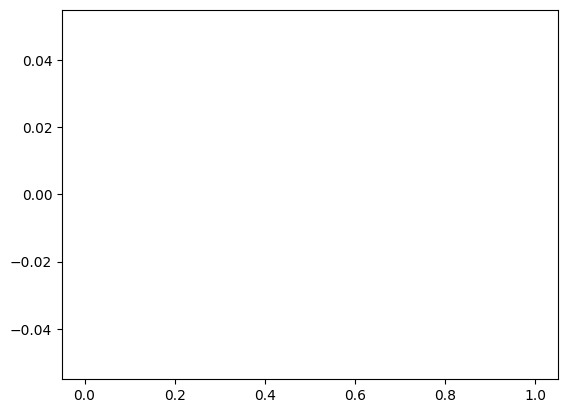

In [ ]:
plot_comparison_JS(lst_comparison_8Q_postQ)

## 10Q vs. Latent_10Q

In [ ]:
lst_comparison_10Q_postQ = []
for i in range(len(arr_cpd_10Q_postQ)):
  result = scipy.spatial.distance.jensenshannon(arr_cpd_10Q_postQ[i], arr_cpd_10Q_postQ_latent[i])
  lst_comparison_10Q_postQ.append(result)

print('elements != 0')
print(len(arr_cpd_10Q_postQ)-lst_comparison_10Q_postQ.count(0))

elements != 0
1277


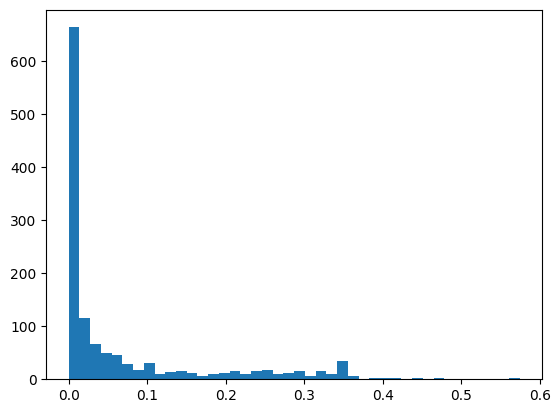

In [ ]:
plot_comparison_JS(lst_comparison_10Q_postQ)